## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('temperature.csv')

### Data Overview

In [3]:
df.head(3)

,new_time,sound_pressure_level [dba],indoor_relative_humidity [%],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],temp_setpoint [Celsius],baromatic_pressure [hPa],outdoor_co2 [ppm],air_temperature [Celsius]
0,2021-09-07 00:00:00,57.073334,52.019665,2.066667,453.500000,1,26.0,1005.198364,463.093536,23.564333
1,2021-09-07 00:05:00,57.016666,51.080666,1.966667,448.866669,1,26.1,1005.198425,462.096314,23.487333
2,2021-09-07 00:10:00,57.083332,50.410667,1.833333,447.333344,1,26.2,1005.200012,463.476074,23.424000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   new_time                         8352 non-null   object 
 1   sound_pressure_level [dba]       8352 non-null   float64
 2   indoor_relative_humidity [%]     8352 non-null   float64
 3   pm2.5 [mu_g/m3]                  8352 non-null   float64
 4   indoor_co2 [ppm]                 8352 non-null   float64
 5   wifi_connected_devices [number]  8352 non-null   int64  
 6   temp_setpoint [Celsius]          8352 non-null   float64
 7   baromatic_pressure [hPa]         8352 non-null   float64
 8   outdoor_co2 [ppm]                8352 non-null   float64
 9   air_temperature [Celsius]        8352 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 652.6+ KB


In [5]:
df.describe()

,sound_pressure_level [dba],indoor_relative_humidity [%],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],temp_setpoint [Celsius],baromatic_pressure [hPa],outdoor_co2 [ppm],air_temperature [Celsius]
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,55.037814,71.216628,5.729438,467.198732,2.170857,25.723161,1003.080744,474.115393,25.572291
std,3.012204,11.441801,11.261687,80.700313,3.245128,2.579282,1.575338,11.553178,1.831005
min,48.450001,45.385174,0.133333,400.000000,0.000000,22.000000,998.799988,438.571075,20.442759
25%,52.450001,63.781477,2.066667,426.631248,1.000000,24.000000,1002.099976,465.507996,24.585333
50%,54.624166,74.352463,3.466667,440.321838,1.000000,25.000000,1003.099976,471.272812,25.512000
75%,56.400834,80.219313,5.066667,469.210358,2.000000,26.500000,1004.200012,483.293510,26.821451
max,78.596664,93.003998,186.100006,1489.357178,29.000000,31.000000,1007.200012,509.600678,33.995171


In [6]:
df['new_time'] = pd.to_datetime(df['new_time'])

In [7]:
df.corr()

,new_time,sound_pressure_level [dba],indoor_relative_humidity [%],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],temp_setpoint [Celsius],baromatic_pressure [hPa],outdoor_co2 [ppm],air_temperature [Celsius]
new_time,1.000000,-0.363390,0.465204,0.320349,0.026863,0.165843,0.156441,-0.057446,0.083242,0.628958
sound_pressure_level [dba],-0.363390,1.000000,-0.421622,0.028976,0.236388,-0.114899,-0.019700,0.274390,-0.223695,-0.381526
indoor_relative_humidity [%],0.465204,-0.421622,1.000000,0.018717,-0.148561,0.026643,0.095448,-0.273345,0.134295,0.499465
pm2.5 [mu_g/m3],0.320349,0.028976,0.018717,1.000000,0.298073,-0.044586,0.051586,0.027441,-0.123046,0.242077
indoor_co2 [ppm],0.026863,0.236388,-0.148561,0.298073,1.000000,-0.014137,0.094535,-0.060748,-0.091661,0.212621
wifi_connected_devices [number],0.165843,-0.114899,0.026643,-0.044586,-0.014137,1.000000,-0.040145,-0.031302,0.332215,0.212018
temp_setpoint [Celsius],0.156441,-0.019700,0.095448,0.051586,0.094535,-0.040145,1.000000,-0.056794,-0.103588,0.267443
baromatic_pressure [hPa],-0.057446,0.274390,-0.273345,0.027441,-0.060748,-0.031302,-0.056794,1.000000,-0.111329,-0.233988
outdoor_co2 [ppm],0.083242,-0.223695,0.134295,-0.123046,-0.091661,0.332215,-0.103588,-0.111329,1.000000,0.234144
air_temperature [Celsius],0.628958,-0.381526,0.499465,0.242077,0.212621,0.212018,0.267443,-0.233988,0.234144,1.000000


<Axes: >

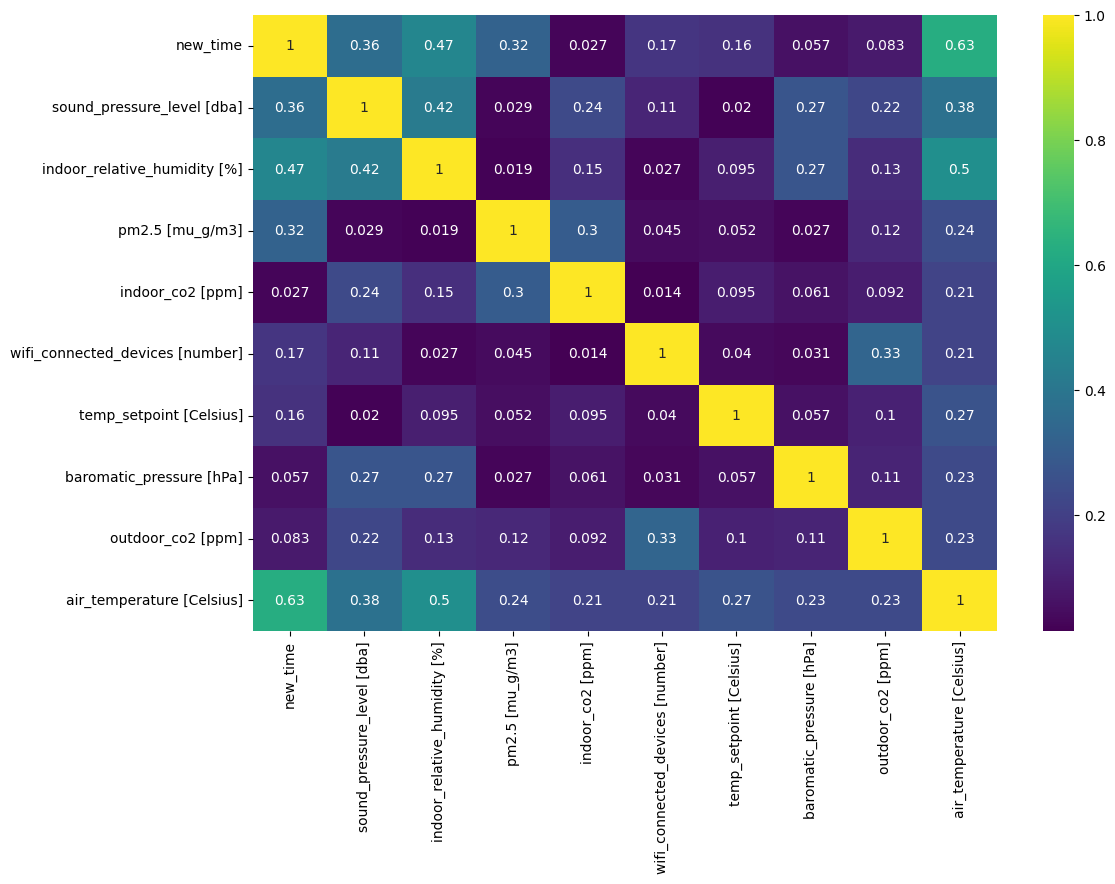

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

In [9]:
df.corr()["air_temperature [Celsius]"].sort_values()

sound_pressure_level [dba]        -0.381526
baromatic_pressure [hPa]          -0.233988
wifi_connected_devices [number]    0.212018
indoor_co2 [ppm]                   0.212621
outdoor_co2 [ppm]                  0.234144
pm2.5 [mu_g/m3]                    0.242077
temp_setpoint [Celsius]            0.267443
indoor_relative_humidity [%]       0.499465
new_time                           0.628958
air_temperature [Celsius]          1.000000
Name: air_temperature [Celsius], dtype: float64

<Axes: >

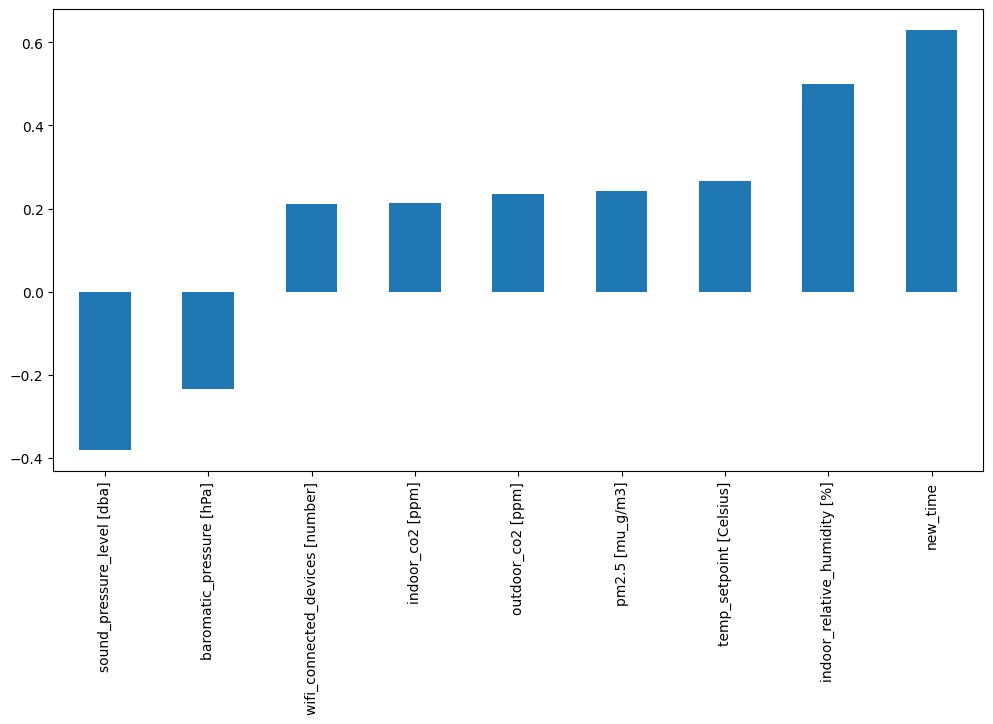

In [10]:
plt.figure(figsize=(12,6))
df.corr()["air_temperature [Celsius]"].sort_values().drop("air_temperature [Celsius]").plot(kind="bar")

In [11]:
df.set_index('new_time', inplace=True)

In [12]:
df.head()

,sound_pressure_level [dba],indoor_relative_humidity [%],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],temp_setpoint [Celsius],baromatic_pressure [hPa],outdoor_co2 [ppm],air_temperature [Celsius]
new_time,,,,,,,,,
2021-09-07 00:00:00,57.073334,52.019665,2.066667,453.500000,1,26.0,1005.198364,463.093536,23.564333
2021-09-07 00:05:00,57.016666,51.080666,1.966667,448.866669,1,26.1,1005.198425,462.096314,23.487333
2021-09-07 00:10:00,57.083332,50.410667,1.833333,447.333344,1,26.2,1005.200012,463.476074,23.424000
2021-09-07 00:15:00,57.093334,50.502666,1.700000,446.066681,1,26.2,1005.200012,462.886261,23.253000
2021-09-07 00:20:00,57.016666,50.307667,1.666667,444.366669,1,26.2,1005.003235,462.496155,23.309000


<Axes: xlabel='new_time'>

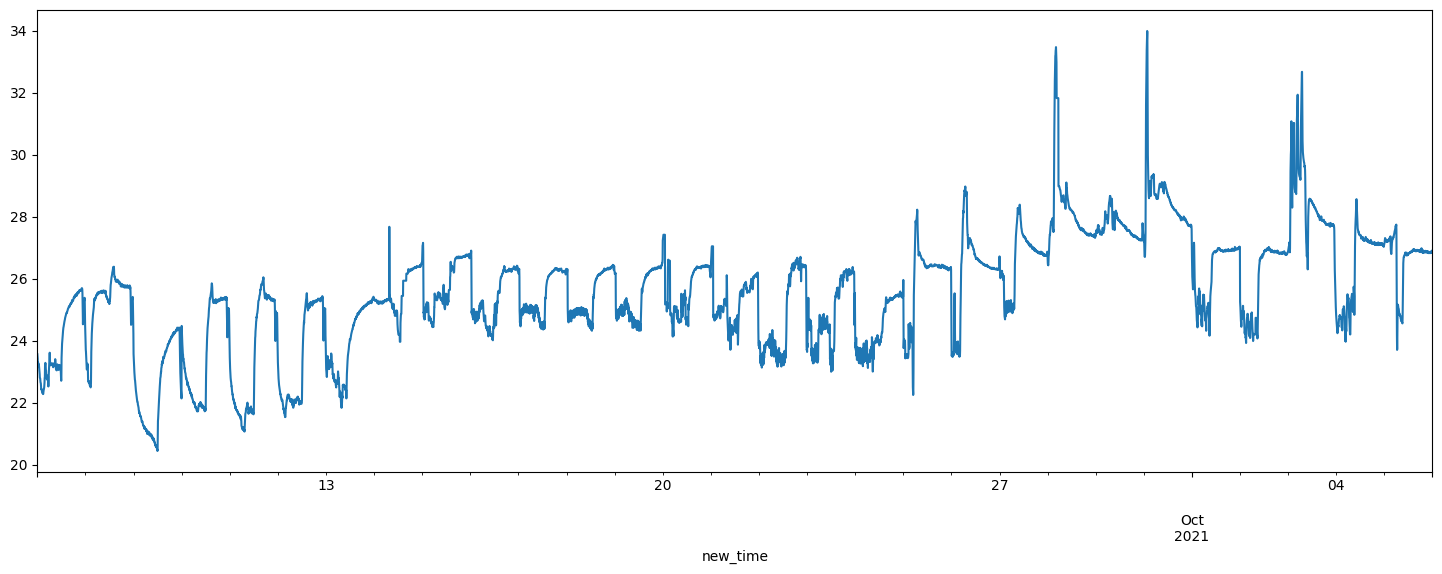

In [13]:
plt.figure(figsize=(18,6))
df["air_temperature [Celsius]"].plot()

In [14]:
df.shape

(8352, 9)

#### Picking data every ten minutes

In [15]:
index = df.index

In [16]:
index

DatetimeIndex(['2021-09-07 00:00:00', '2021-09-07 00:05:00',
               '2021-09-07 00:10:00', '2021-09-07 00:15:00',
               '2021-09-07 00:20:00', '2021-09-07 00:25:00',
               '2021-09-07 00:30:00', '2021-09-07 00:35:00',
               '2021-09-07 00:40:00', '2021-09-07 00:45:00',
               ...
               '2021-10-05 23:10:00', '2021-10-05 23:15:00',
               '2021-10-05 23:20:00', '2021-10-05 23:25:00',
               '2021-10-05 23:30:00', '2021-10-05 23:35:00',
               '2021-10-05 23:40:00', '2021-10-05 23:45:00',
               '2021-10-05 23:50:00', '2021-10-05 23:55:00'],
              dtype='datetime64[ns]', name='new_time', length=8352, freq=None)

In [17]:
index.shape

(8352,)

In [18]:
new_index = pd.date_range(start=index[0], end=index[-1], freq='10T')
new_df = df.loc[new_index]

In [19]:
new_df.shape

(4176, 9)

In [20]:
new_df.head(5)

,sound_pressure_level [dba],indoor_relative_humidity [%],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],temp_setpoint [Celsius],baromatic_pressure [hPa],outdoor_co2 [ppm],air_temperature [Celsius]
2021-09-07 00:00:00,57.073334,52.019665,2.066667,453.500000,1,26.0,1005.198364,463.093536,23.564333
2021-09-07 00:10:00,57.083332,50.410667,1.833333,447.333344,1,26.2,1005.200012,463.476074,23.424000
2021-09-07 00:20:00,57.016666,50.307667,1.666667,444.366669,1,26.2,1005.003235,462.496155,23.309000
2021-09-07 00:30:00,57.209999,49.806667,1.166667,435.766663,1,26.3,1005.000000,462.689575,23.264999
2021-09-07 00:40:00,57.148277,49.442760,1.034483,434.862060,1,26.3,1004.996765,464.475861,23.170000


<Axes: >

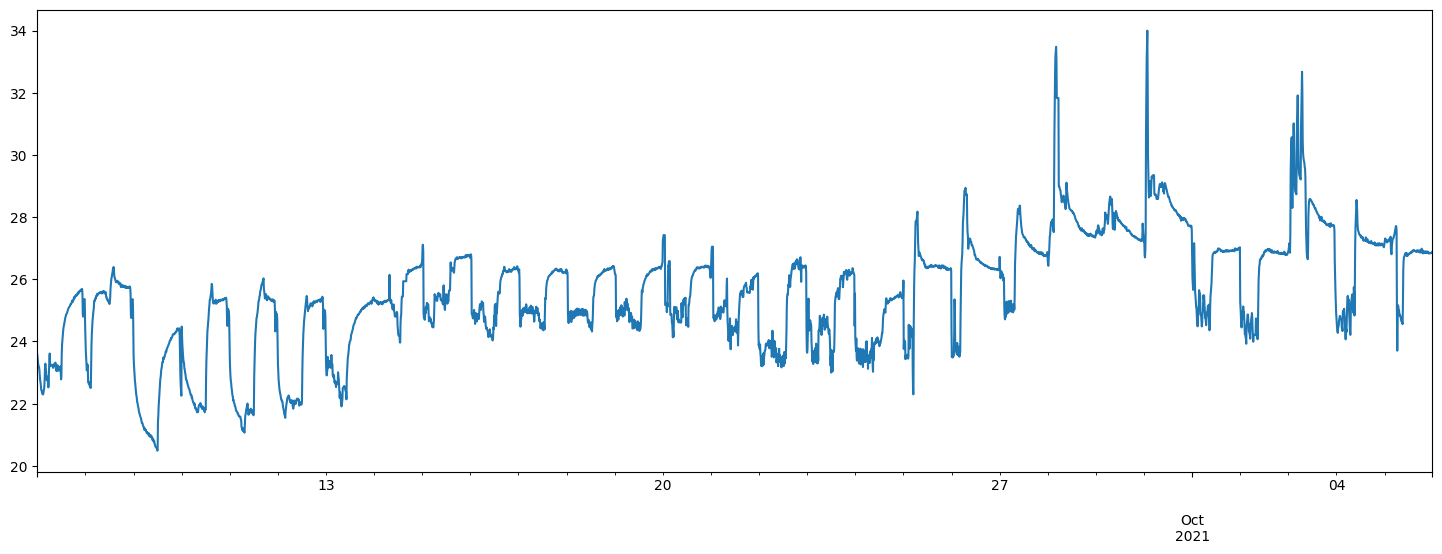

In [21]:
plt.figure(figsize=(18,6))
new_df["air_temperature [Celsius]"].plot()

In [22]:
new_df.head()

,sound_pressure_level [dba],indoor_relative_humidity [%],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],temp_setpoint [Celsius],baromatic_pressure [hPa],outdoor_co2 [ppm],air_temperature [Celsius]
2021-09-07 00:00:00,57.073334,52.019665,2.066667,453.500000,1,26.0,1005.198364,463.093536,23.564333
2021-09-07 00:10:00,57.083332,50.410667,1.833333,447.333344,1,26.2,1005.200012,463.476074,23.424000
2021-09-07 00:20:00,57.016666,50.307667,1.666667,444.366669,1,26.2,1005.003235,462.496155,23.309000
2021-09-07 00:30:00,57.209999,49.806667,1.166667,435.766663,1,26.3,1005.000000,462.689575,23.264999
2021-09-07 00:40:00,57.148277,49.442760,1.034483,434.862060,1,26.3,1004.996765,464.475861,23.170000


#### Choose data that is correlated with air_temperature

In [23]:
corr_with_temperature = new_df.corr().abs()["air_temperature [Celsius]"]
data =new_df[corr_with_temperature[corr_with_temperature > 0.25].index]

In [24]:
data.columns

Index(['sound_pressure_level [dba]', 'indoor_relative_humidity [%]',
       'temp_setpoint [Celsius]', 'air_temperature [Celsius]'],
      dtype='object')

In [25]:
data.head()

,sound_pressure_level [dba],indoor_relative_humidity [%],temp_setpoint [Celsius],air_temperature [Celsius]
2021-09-07 00:00:00,57.073334,52.019665,26.0,23.564333
2021-09-07 00:10:00,57.083332,50.410667,26.2,23.424000
2021-09-07 00:20:00,57.016666,50.307667,26.2,23.309000
2021-09-07 00:30:00,57.209999,49.806667,26.3,23.264999
2021-09-07 00:40:00,57.148277,49.442760,26.3,23.170000


In [26]:
data.describe()

,sound_pressure_level [dba],indoor_relative_humidity [%],temp_setpoint [Celsius],air_temperature [Celsius]
count,4176.000000,4176.000000,4176.000000,4176.000000
mean,55.045003,71.218071,25.722701,25.572191
std,3.009478,11.441671,2.578011,1.830884
min,50.571430,45.444138,22.000000,20.488667
25%,52.456665,63.796103,24.000000,24.585417
50%,54.657642,74.326111,25.000000,25.512000
75%,56.410000,80.209311,26.500000,26.821451
max,73.693336,93.003998,31.000000,33.995171


# Data Preprocessing 

In [27]:
data['Seconds'] = data.index.map(pd.Timestamp.timestamp)

In [28]:
data.head()

,sound_pressure_level [dba],indoor_relative_humidity [%],temp_setpoint [Celsius],air_temperature [Celsius],Seconds
2021-09-07 00:00:00,57.073334,52.019665,26.0,23.564333,1.630973e+09
2021-09-07 00:10:00,57.083332,50.410667,26.2,23.424000,1.630973e+09
2021-09-07 00:20:00,57.016666,50.307667,26.2,23.309000,1.630974e+09
2021-09-07 00:30:00,57.209999,49.806667,26.3,23.264999,1.630975e+09
2021-09-07 00:40:00,57.148277,49.442760,26.3,23.170000,1.630975e+09


In [29]:
day = 60*60*24
year = 365.2425*day

data['Day sin'] = np.sin(data['Seconds'] * (2* np.pi / day))
data['Day cos'] = np.cos(data['Seconds'] * (2 * np.pi / day))
data['Year sin'] = np.sin(data['Seconds'] * (2 * np.pi / year))
data['Year cos'] = np.cos(data['Seconds'] * (2 * np.pi / year))
data.head()

,sound_pressure_level [dba],indoor_relative_humidity [%],temp_setpoint [Celsius],air_temperature [Celsius],Seconds,Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,57.073334,52.019665,26.0,23.564333,1.630973e+09,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,57.083332,50.410667,26.2,23.424000,1.630973e+09,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,57.016666,50.307667,26.2,23.309000,1.630974e+09,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,57.209999,49.806667,26.3,23.264999,1.630975e+09,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,57.148277,49.442760,26.3,23.170000,1.630975e+09,1.736482e-01,0.984808,-0.914090,-0.405512


In [30]:
data.drop("Seconds", axis=1, inplace=True)

In [31]:
data.columns

Index(['sound_pressure_level [dba]', 'indoor_relative_humidity [%]',
       'temp_setpoint [Celsius]', 'air_temperature [Celsius]', 'Day sin',
       'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [32]:
data = data[['air_temperature [Celsius]','sound_pressure_level [dba]', 'indoor_relative_humidity [%]',
       'temp_setpoint [Celsius]', 'Day sin',
       'Day cos', 'Year sin', 'Year cos']]

In [33]:
data.head()

,air_temperature [Celsius],sound_pressure_level [dba],indoor_relative_humidity [%],temp_setpoint [Celsius],Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,23.564333,57.073334,52.019665,26.0,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,23.424000,57.083332,50.410667,26.2,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,23.309000,57.016666,50.307667,26.2,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,23.264999,57.209999,49.806667,26.3,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,23.170000,57.148277,49.442760,26.3,1.736482e-01,0.984808,-0.914090,-0.405512


#### Convert df to numpy arrays & creating windows of data

In [34]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # print(i)
    row = [r for r in df_as_np[i:i+window_size]]
    # print(row)
    X.append(row)
    label = df_as_np[i+window_size][0]
    # print(label)
    y.append(label)
  return np.array(X), np.array(y)

In [35]:
X, y = df_to_X_y(data)
X.shape, y.shape

((4171, 5, 8), (4171,))

In [36]:
X

array([[[23.56433296, 57.07333374, 52.01966476, ...,  1.        ,
         -0.91389584, -0.40594875],
        [23.42399979, 57.08333206, 50.41066742, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [23.30900002, 57.01666641, 50.30766678, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [23.26499939, 57.20999908, 49.80666733, ...,  0.99144486,
         -0.91404127, -0.40562119],
        [23.17000008, 57.14827728, 49.44276047, ...,  0.98480775,
         -0.91408972, -0.405512  ]],

       [[23.42399979, 57.08333206, 50.41066742, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [23.30900002, 57.01666641, 50.30766678, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [23.26499939, 57.20999908, 49.80666733, ...,  0.99144486,
         -0.91404127, -0.40562119],
        [23.17000008, 57.14827728, 49.44276047, ...,  0.98480775,
         -0.91408972, -0.405512  ],
        [23.18133354, 57.18333435, 48.80666733, ...,  0.97629601,
         -0.91

#### split the data into training, validation, and test sets

In [37]:
X_train, y_train = X[:3000], y[:3000]
X_val, y_val = X[3000:3800], y[3000:3800]
X_test, y_test = X[3800:], y[3800:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3000, 5, 8), (3000,), (800, 5, 8), (800,), (371, 5, 8), (371,))

In [38]:
X_train

array([[[ 2.35643330e+01,  5.70733337e+01,  5.20196648e+01, ...,
          1.00000000e+00, -9.13895843e-01, -4.05948752e-01],
        [ 2.34239998e+01,  5.70833321e+01,  5.04106674e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 2.33090000e+01,  5.70166664e+01,  5.03076668e+01, ...,
          9.96194698e-01, -9.13992809e-01, -4.05730385e-01],
        [ 2.32649994e+01,  5.72099991e+01,  4.98066673e+01, ...,
          9.91444861e-01, -9.14041272e-01, -4.05621193e-01],
        [ 2.31700001e+01,  5.71482773e+01,  4.94427605e+01, ...,
          9.84807753e-01, -9.14089723e-01, -4.05511996e-01]],

       [[ 2.34239998e+01,  5.70833321e+01,  5.04106674e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 2.33090000e+01,  5.70166664e+01,  5.03076668e+01, ...,
          9.96194698e-01, -9.13992809e-01, -4.05730385e-01],
        [ 2.32649994e+01,  5.72099991e+01,  4.98066673e+01, ...,
          9.91444861e-01, -9.14041272e-01, -4.05621

#### scaling the features

In [39]:
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

spl_training_mean =np.mean(X_train[:, :, 1])
spl_training_std = np.std(X_train[:, :, 1])

rh_training_mean =np.mean(X_train[:, :, 2])
rh_training_std = np.std(X_train[:, :, 2])

tsp_training_mean =np.mean(X_train[:, :, 3])
tsp_training_std = np.std(X_train[:, :, 3])

In [40]:
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  X[:, :, 1] = (X[:, :, 1] - spl_training_mean) / spl_training_std
  X[:, :, 2] = (X[:, :, 2] - rh_training_mean) / rh_training_std
  X[:, :, 3] = (X[:, :, 3] - tsp_training_mean) / tsp_training_std




In [41]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [42]:
def preprocess_output(y):
  y[:] = (y[:] - temp_training_mean) / temp_training_std


In [43]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [44]:
X_train

array([[[-0.89647424,  0.56255213, -1.54488602, ...,  1.        ,
         -0.91389584, -0.40594875],
        [-0.98994663,  0.56600633, -1.67790702, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [-1.06654508,  0.54297479, -1.68642242, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [-1.09585279,  0.60976704, -1.72784166, ...,  0.99144486,
         -0.91404127, -0.40562119],
        [-1.15912943,  0.58844349, -1.75792702, ...,  0.98480775,
         -0.91408972, -0.405512  ]],

       [[-0.98994663,  0.56600633, -1.67790702, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [-1.06654508,  0.54297479, -1.68642242, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [-1.09585279,  0.60976704, -1.72784166, ...,  0.99144486,
         -0.91404127, -0.40562119],
        [-1.15912943,  0.58844349, -1.75792702, ...,  0.98480775,
         -0.91408972, -0.405512  ],
        [-1.1515805 ,  0.60055495, -1.81051489, ...,  0.97629601,
         -0.91

In [45]:
y_test


array([ 2.28092514e+00,  2.39437896e+00,  2.41902417e+00,  2.44704873e+00,
        2.42146594e+00,  2.41924649e+00,  2.43389971e+00,  2.41325130e+00,
        2.40368110e+00,  2.39482361e+00,  2.37306484e+00,  2.36862467e+00,
        2.33532143e+00,  2.33271069e+00,  2.31667142e+00,  2.31955658e+00,
        2.29846479e+00,  2.26671530e+00,  2.25627994e+00,  2.24162672e+00,
        2.25405921e+00,  2.21209668e+00,  2.20299401e+00,  2.17945916e+00,
        2.16688056e+00,  2.16547165e+00,  2.13061340e+00,  2.12040037e+00,
        2.11640484e+00,  2.10749146e+00,  2.08265696e+00,  2.04691068e+00,
        2.07133355e+00,  2.03425458e+00,  1.98696384e+00,  2.00627956e+00,
        2.03780799e+00,  2.01937904e+00,  2.06578301e+00,  2.01212611e+00,
        1.97164364e+00,  1.98385508e+00,  1.98274472e+00,  1.96676008e+00,
        1.97050279e+00,  1.95765613e+00,  1.98341170e+00,  1.95543668e+00,
        1.93634201e+00,  1.94699971e+00,  1.93878380e+00,  1.92168879e+00,
        1.90215075e+00,  

# Model defining 

#### import of TensorFlow and Keras libraries along with specific modules and functions for constructing and training a neural network model.

In [46]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import EarlyStopping

#### Define a Sequential model

In [47]:
X_train.shape

(3000, 5, 8)

In [48]:
model = Sequential()
model.add(InputLayer((5,8)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 32)          │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,609 (119.57 KB)

 Trainable params: 30,609 (119.57 KB)

 Non-trainable params: 0 (0.00 B)

#### define necessary callbacks

In [49]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15)

In [50]:
cp = ModelCheckpoint('Temperature_model/model_checkpoint.keras', save_best_only=True)

#### compile model

In [51]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### Fit the model to training data

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp, early_stop])

Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.9450 - root_mean_squared_error: 0.9719 - val_loss: 3.6386 - val_root_mean_squared_error: 1.9075
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6966 - root_mean_squared_error: 0.8337 - val_loss: 2.9382 - val_root_mean_squared_error: 1.7141
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3693 - root_mean_squared_error: 0.6075 - val_loss: 2.3198 - val_root_mean_squared_error: 1.5231
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2305 - root_mean_squared_error: 0.4800 - val_loss: 1.8220 - val_root_mean_squared_error: 1.3498
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1581 - root_mean_squared_error: 0.3971 - val_loss: 1.4608 - val_root_mean_squared_error: 1.2086
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1048 - root_mean_squared_error: 0.3236 - val_loss: 1.1187 - val_root_mean_squared_error: 1.0577
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step -

#### Evaluate the performance of LSTM model

In [53]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

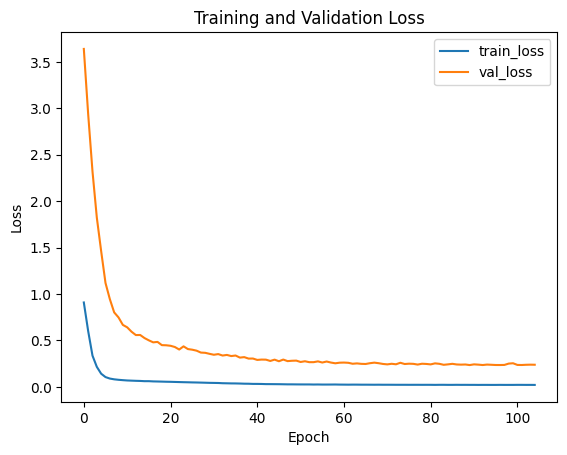

In [54]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [55]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step


In [56]:
rmse = np.sqrt(mse(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.17847681389970224


In [57]:
# model.save("lstm_model_temperature.h5")

#### load saved best model

In [58]:
temp_load_model = load_model('Temperature_model/model_checkpoint.keras')

In [59]:
y_pred_loadmodel = temp_load_model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [60]:
rmse = np.sqrt(mse(y_test, y_pred_loadmodel))
print("RMSE:", rmse)

RMSE: 0.1808626579682125


## Comparison between actual temperature and predicted temperature

In [61]:
predictions = model.predict(X)

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [62]:
predictions.shape

(4171, 1)

In [63]:
predictions =predictions.reshape(-1)

In [64]:
y.shape

(4171,)

In [65]:
def reverse_preprocessed_temperature(arr):
    arr = (arr * temp_training_std ) + temp_training_mean
    return arr

In [66]:
act_val = reverse_preprocessed_temperature(y)

In [67]:
pre_val = reverse_preprocessed_temperature(predictions)

In [68]:
predVSactual = pd.DataFrame({'Actual_val(scaled)': y, 
                             'Predicted_val(scaled)': predictions,
                             "Actual Temperature [Celsius]": act_val,
                             "Predicted Temperature [Celsius]":pre_val
                             })

In [69]:
predVSactual

,Actual_val(scaled),Predicted_val(scaled),Actual Temperature [Celsius],Predicted Temperature [Celsius]
0,-1.151581,-1.156981,23.181334,23.173227
1,-1.205977,-1.148898,23.099667,23.185362
2,-1.326981,-1.209224,22.917999,23.094791
3,-1.410018,-1.334514,22.793333,22.906691
4,-1.458634,-1.416994,22.720345,22.782860
...,...,...,...,...
4166,1.294024,1.249879,26.853001,26.786724
4167,1.293802,1.256918,26.852667,26.797293
4168,1.289805,1.246275,26.846666,26.781313
4169,1.289885,1.230930,26.846787,26.758276


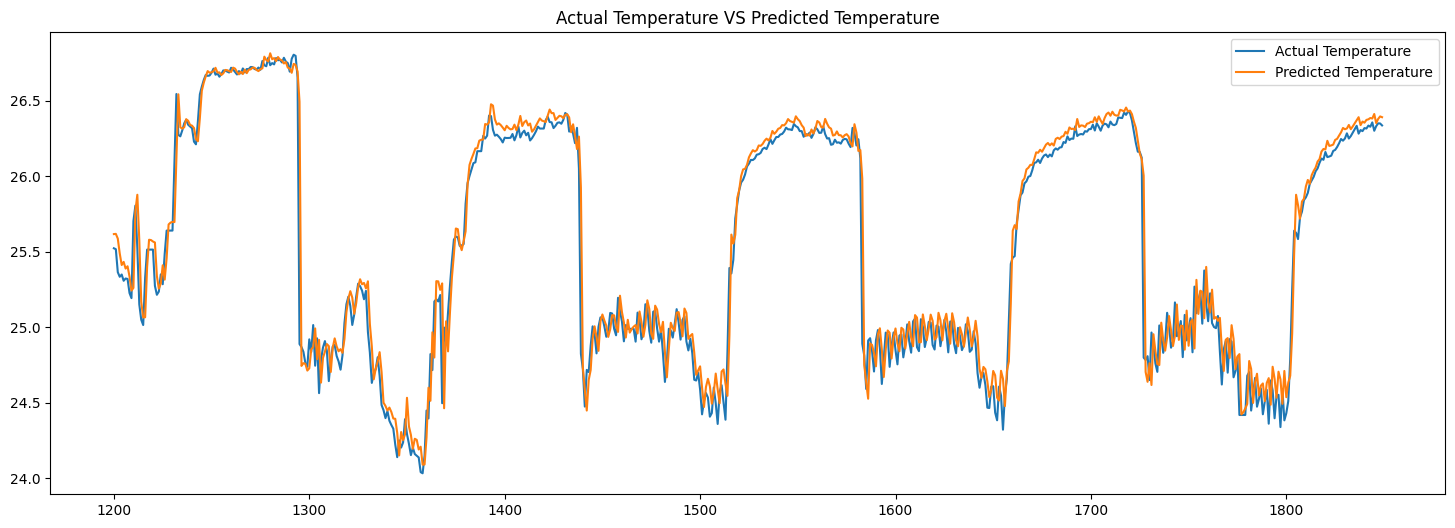

In [70]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["Actual Temperature [Celsius]"][1200:1850], label="Actual Temperature")
plt.plot(predVSactual["Predicted Temperature [Celsius]"][1200:1850], label="Predicted Temperature")
plt.title('Actual Temperature VS Predicted Temperature')
plt.legend(loc=0)

### Get predictions

In [71]:
def convert_df_input_arr(df, window_size=5):
    df_as_np = df.to_numpy()
    x = []
    row = [r for r in df_as_np[0:window_size]]
    # print(row)
    x.append(row)

    return np.array(x)

In [72]:
p= convert_df_input_arr(data[:5])
p

array([[[ 2.35643330e+01,  5.70733337e+01,  5.20196648e+01,
          2.60000000e+01, -1.25176613e-11,  1.00000000e+00,
         -9.13895843e-01, -4.05948752e-01],
        [ 2.34239998e+01,  5.70833321e+01,  5.04106674e+01,
          2.62000000e+01,  4.36193874e-02,  9.99048222e-01,
         -9.13944332e-01, -4.05839571e-01],
        [ 2.33090000e+01,  5.70166664e+01,  5.03076668e+01,
          2.62000000e+01,  8.71557427e-02,  9.96194698e-01,
         -9.13992809e-01, -4.05730385e-01],
        [ 2.32649994e+01,  5.72099991e+01,  4.98066673e+01,
          2.63000000e+01,  1.30526192e-01,  9.91444861e-01,
         -9.14041272e-01, -4.05621193e-01],
        [ 2.31700001e+01,  5.71482773e+01,  4.94427605e+01,
          2.63000000e+01,  1.73648178e-01,  9.84807753e-01,
         -9.14089723e-01, -4.05511996e-01]]])

In [73]:
p.shape

(1, 5, 8)

In [74]:
preprocess(p)


In [75]:
p

array([[[-0.89647424,  0.56255213, -1.54488602, 26.        ,
          0.33563611,  1.        , -0.91389584, -0.40594875],
        [-0.98994663,  0.56600633, -1.67790702, 26.2       ,
          0.45010565,  0.99904822, -0.91394433, -0.40583957],
        [-1.06654508,  0.54297479, -1.68642242, 26.2       ,
          0.45010565,  0.9961947 , -0.91399281, -0.40573039],
        [-1.09585279,  0.60976704, -1.72784166, 26.3       ,
          0.50734041,  0.99144486, -0.91404127, -0.40562119],
        [-1.15912943,  0.58844349, -1.75792702, 26.3       ,
          0.50734041,  0.98480775, -0.91408972, -0.405512  ]]])

In [79]:
scaled_next_temp =model.predict(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [80]:
next_temp = reverse_preprocessed_temperature(scaled_next_temp)

In [82]:
next_temp[0][0]

23.173225